## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor, plot_tree

In [2]:
## Plotting Style

plt.style.use('fivethirtyeight')

## Import Dataset

In [3]:
df=pd.read_csv('../Customer Segmentation/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


## Removing 'CustomerID' Column

In [6]:
df = df.drop(columns='CustomerID')

In [7]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Data Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [9]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Separate Columns by Data Type

In [10]:
num_cols = ['Age','Annual Income (k$)','Spending Score (1-100)']
cat_cols = ['Gender']

## Get Summary Statistics

In [11]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.00,38.85,13.97,18.00,28.75,36.00,49.00,70.00
Annual Income (k$),200.00,60.56,26.26,15.00,41.50,61.50,78.00,137.00
Spending Score (1-100),200.00,50.20,25.82,1.00,34.75,50.00,73.00,99.00


In [12]:
df[cat_cols].describe(include='object').T

,count,unique,top,freq
Gender,200,2,Female,112


## Pearson Correlation

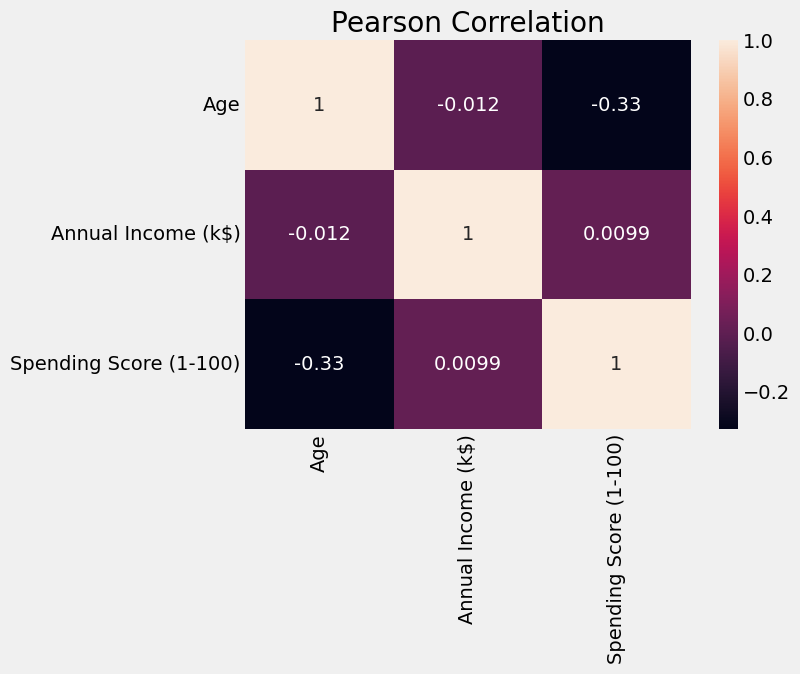

In [13]:
sns.heatmap(df[num_cols].corr(),annot=True)
plt.title('Pearson Correlation')
plt.show()

## Plot Numerical Data Separated by Gender

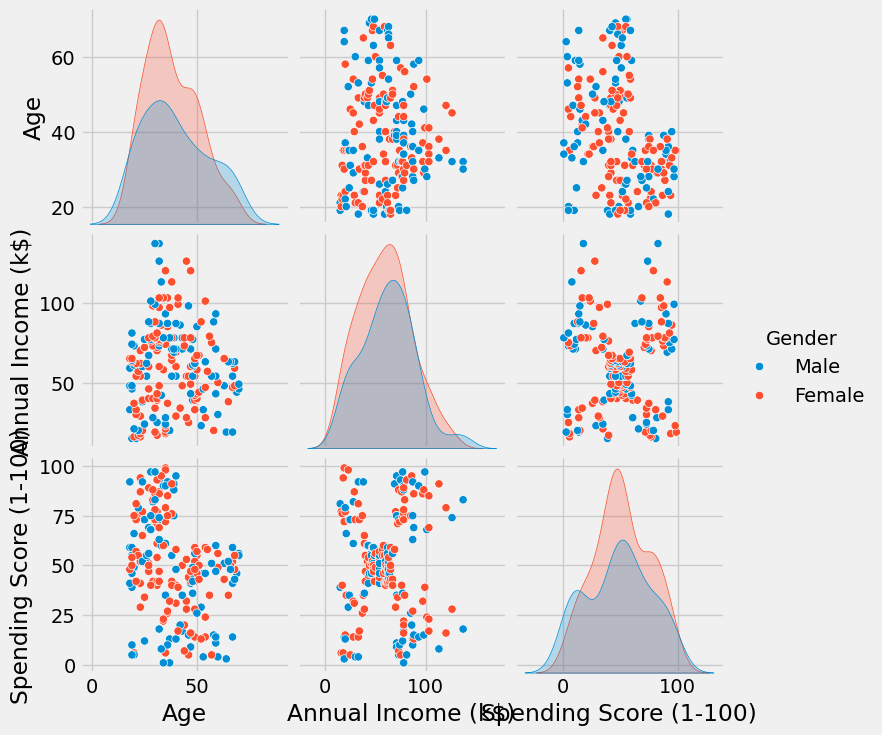

In [14]:
sns.pairplot(data=df, hue='Gender')
plt.show()

## Display Distribution of Target Variable

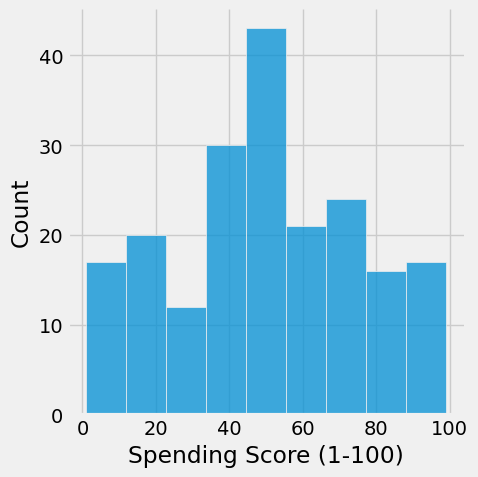

In [15]:
sns.displot(df['Spending Score (1-100)'])
plt.show()

# Display Distribution of Income Variable Stratified by Gender

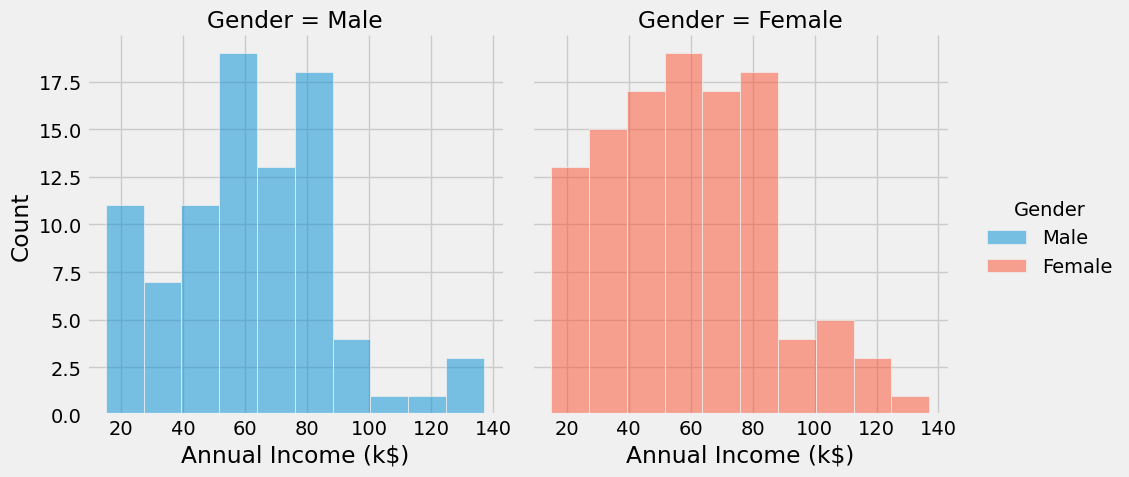

In [16]:
sns.displot(data=df, x='Annual Income (k$)', hue='Gender', col='Gender')
plt.show()

## Display Distribution of Target Variable Stratified by Gender

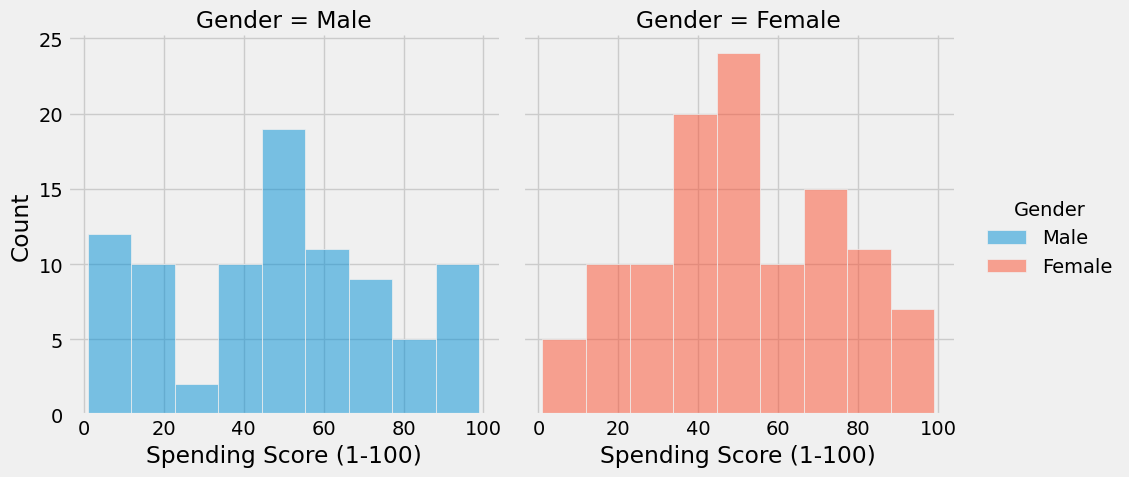

In [17]:
sns.displot(data=df, x='Spending Score (1-100)', hue='Gender', col='Gender')
plt.show()

## Perform Student t-test for Independence by Gender

In [18]:
alpha = 0.05
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']
t_stat, p = stats.ttest_ind(female['Spending Score (1-100)'],male['Spending Score (1-100)'])
print('H0: There is no significant difference in spending score between genders \n')
print('t-statistic: ', t_stat)
print('p-value', p/2,'\n') # One-sided test
if p/2 < alpha:
    print('Reject H0 (Dependent)')
else:
    print('Do not reject H0 (Independent)')

H0: There is no significant difference in spending score between genders 

t-statistic:  0.8190464150660334
p-value 0.2068723294926087 

Do not reject H0 (Independent)


##  Fit a Basic OLS Regression

In [19]:
mod = smf.ols(formula="Q('Spending Score (1-100)')~Gender + Q('Annual Income (k$)')",data=df).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:     Q('Spending Score (1-100)')   R-squared:                       0.004
Model:                                     OLS   Adj. R-squared:                 -0.007
Method:                          Least Squares   F-statistic:                    0.3510
Date:                         Sun, 24 Dec 2023   Prob (F-statistic):              0.704
Time:                                 11:48:02   Log-Likelihood:                -933.19
No. Observations:                          200   AIC:                             1872.
Df Residuals:                              197   BIC:                             1882.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

## Evaluate Model Performances

In [20]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
X = df.drop(columns='Spending Score (1-100)')
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models.head()

100%|██████████| 42/42 [00:03<00:00, 11.23it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 3
[LightGBM] [Info] Start training from score 51.364286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.34,0.38,19.30,0.05
HistGradientBoostingRegressor,0.34,0.37,19.40,0.19
AdaBoostRegressor,0.27,0.31,20.37,0.18
RandomForestRegressor,0.22,0.26,20.97,0.49
BaggingRegressor,0.22,0.26,21.04,0.09


## Evaluate the Best model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 3
[LightGBM] [Info] Start training from score 51.364286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

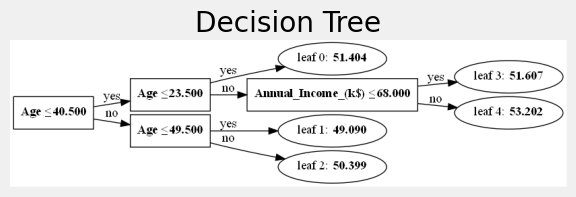

In [21]:
lgbm = LGBMRegressor().fit(X_train,y_train)
print('R-Squared Score: ',lgbm.score(X_test,y_test), '\n')
plot_tree(lgbm)
plt.title('Decision Tree')
plt.show()